This notebook is for investigating correlation between resevoir strains and global measures of LA function and structure (LAEF, LA ed vol).

This bolsters the idea that we are indeed measuring LA mechanics.

For regional correlations: allows us to investigate which regional motion has biggest effect on ejection fraction. 

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [9]:
numTimes = 10

nTime=np.arange(0, numTimes)/numTimes

DataPath="/home/csi20/Dropbox/phd/Data/RG_CT_Cases"
# DataPath="/media/csi20local/Seagate Portable Drive/Master/Data/RG_CT_Cases"

f20_cases = ['21', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '34']
f20_cases = [f'CT-CRT/case{case_ind}' for case_ind in f20_cases]
ebr=['EBR/case01', 'EBR/case02']
f20_cases = f20_cases + ebr

## All 30 Cases
# nonAF
nonaf_cases = ['01', '02', '05', '06', '07', '08', '09', '12', '14',
             '15', '16', '17', '18', '24', '27', '28', '29', '30',
             '32']
nonaf_cases = [f"CT-CRT/case{case}" for case in nonaf_cases]

# AF
af_cases = ['10', '19', '20', '23', '26', '31', '25', '34']
af_cases = [f'CT-CRT/case{case}' for case in af_cases]
af_cases = af_cases + ebr

def plot_strain(ax, case, label, strain_type, region):
    
    """
    Use to plot area and squeez strains.
    Usage:
        * ax: axis to plot on
        * case: case
        * label: label for curve
        * strain_type: either area or squeez
        * region: global, roof, lat, sept, ant, post
    """
    
    if case in f20_cases:
        filepath=f'{DataPath}/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9'
    
    else:
        filepath=f'{DataPath}/{case}/MT-HiRes/SW-0.0-BE-1e-9'
    
    ## load and plot data
    data = np.loadtxt(f'{filepath}/{strain_type}_meanstrains_{region}_excl_PVs.txt')
    ax.plot(nTime, data, label=label)

def data_range(case, strain_type, region):
    """
    Use this function to retrieve range of area meanstrains_{region} transients
    Usage:
        * strain_type: area, squeez
        * region: global, ant, lat, post, roof, sept
    """
    
    if case in f20_cases:
        filepath=f'{DataPath}/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9'
    
    else:
        filepath=f'{DataPath}/{case}/MT-HiRes/SW-0.0-BE-1e-9'
        
#     data = np.loadtxt(f'{filepath}/{strain_type}_meanstrains_{region}.txt')
    data = np.loadtxt(f'{filepath}/{strain_type}_meanstrains_{region}_excl_PVs.txt')
    
    data_range = np.ptp(data)
    
    return data_range

In [12]:
## Global reservoir strains 

nonAF_ranges = np.zeros(len(nonaf_cases), 6)
AF_ranges = np.zeros(len(af_cases), 6)

nonAF_ranges = []
AF_ranges=[]

for case in nonaf_cases:
    for region in ['global', '']
    nonAF_ranges.append(data_range(case, 'area', 'global'))
    
for case in af_cases:
    AF_ranges.append(data_range(case, 'area', 'global'))
    
print("nonAF_ranges len: ", len(nonAF_ranges))
print("AF_ranges len: ", len(AF_ranges))

all_ranges = nonAF_ranges + AF_ranges

nonAF_ranges len:  19
AF_ranges len:  10


In [26]:
## Retrieve LAEF and LAvolume

nonAF_LAEF = []
nonAF_LA_vol = []

AF_LAEF = []
AF_LA_vol = []

for case in nonaf_cases:
    filepath = f'{DataPath}/{case}/multilabel_seg_analysis/LA_EF.txt'
    laef_data = np.loadtxt(filepath)
    
    nonAF_LAEF.append(laef_data)

for case in af_cases:
    filepath = f'{DataPath}/{case}/multilabel_seg_analysis/LA_EF.txt'
    laef_data = np.loadtxt(filepath)
    
    AF_LAEF.append(laef_data)
    
all_LAEF = nonAF_LAEF + AF_LAEF

In [27]:
len(all_LAEF)

29

r:  0.8901864106809357 p:  1.0246668373748265e-10


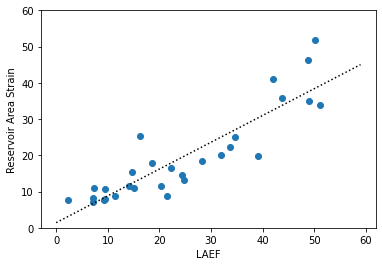

In [42]:
a, b = np.polyfit(all_LAEF, all_ranges, 1)

plt.scatter(all_LAEF, all_ranges)

x = np.arange(0, 60)
plt.plot(x, a*x+b, c='black', ls='dotted')

plt.xlabel("LAEF")
plt.ylabel("Reservoir Area Strain")

plt.ylim(0, 60)
result = stats.pearsonr(all_LAEF, all_ranges)
print("r: ", result[0], "p: ", result[1])

In [36]:
type(result)

tuple